## TESS data contains data quality flags for various events that the telescope experiences
# The following is from https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20180007935.pdf

Some files include an integer field or table column that describes any anomalies detected in the data for that cadence or image.
These integers should be treated as individual bits that have the meanings described in table 28. Implementers should not
assume this represents a comprehensive list of flags and that flags not defined here will be available for their use as it is very
likely there will be changes to flag values after launch. Undefined bits will be set to zero.

| Bit | Value | FFI | Description                                                         |
|-----|-------|-----|---------------------------------------------------------------------|
| 1   | 1     | Y   | Attitude Tweak                                                      |
| 2   | 2     | N   | Safe Mode                                                           |
| 3   | 4     | Y   | Spacecraft is in Coarse Point                                       |
| 4   | 8     | Y   | Spacecraft is in Earth Point                                        |
| 5   | 16    | Y   | Argabrightening event                                               |
| 6   | 32    | Y   | Reaction Wheel desaturation Event                                   |
| 7   | 64    | N   | Cosmic Ray in Optimal Aperture pixel                                |
| 8   | 128   | Y   | Manual Exclude. The cadence was excluded because of an anomaly.     |
| 9   | 256   | N   | Discontinuity corrected between this cadence and the following one. |
| 10  | 512   | N   | Impulsive outlier removed before cotrending.                        |
| 11  | 1024  | Y   | Cosmic ray detected on collateral pixel row or column.              |
| 12  | 2048  | Y   | Straylight from Earth or Moon in camera FOV.                        |


In the Target Pixel Files (TPFs), you can check where these Bits are not equal to 0.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import matplotlib.gridspec as gridspec

import astropy
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
from lightkurve import search_targetpixelfile
from transitleastsquares import catalog_info

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #<--- these are annoying

In [87]:
# ID = 25115881 #only S1
ID = 316937670 #works for S1,S2


print("TIC ID: ",ID)
qld, R_star, R_star_min, R_star_max, M_star, M_star_min, M_star_max = catalog_info(TIC_ID=ID)
print('Quadratic limb darkening q1, q2: ', qld[0], qld[1])
print('Stellar radius: ', R_star, '+', R_star_max, '-', R_star_min, 'solar radii')
print('Stellar mass: ', M_star, '+', M_star_max, '-', M_star_min,'solar mass')
print(" ")


TIC ID:  316937670
Quadratic limb darkening q1, q2:  0.1604 0.4325
Stellar radius:  0.385618 + 0.0202788 - 0.0202788 solar radii
Stellar mass:  0.394818 + 0.011787 - 0.011787 solar mass
 


# Sector 1

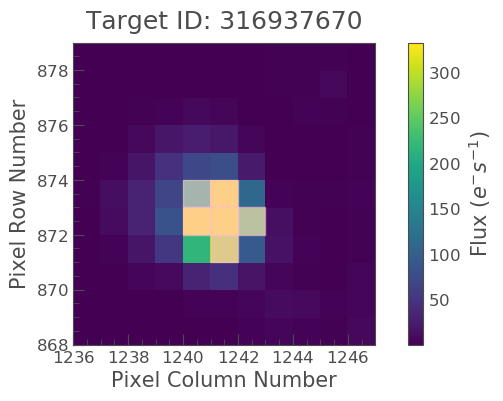

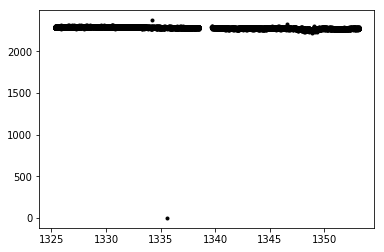

now lets see what data points were flagged (where Bit != 0)
[512  16 512 512]
18104 18104
 
we can create a mask to remove these points


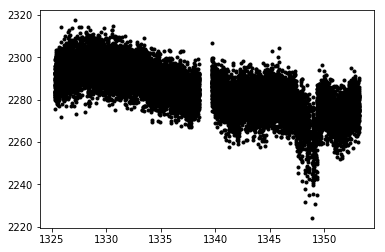

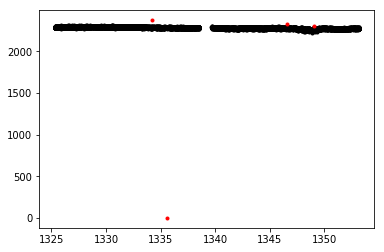

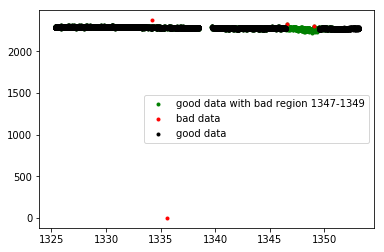

below: momentum dump every 2.5 days?


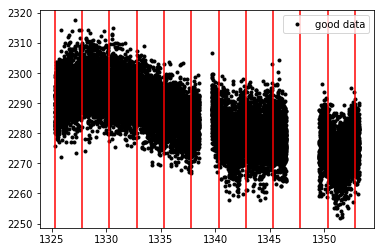

 bad times
[1334.23280671 1335.58699214 1346.54959071 1349.06070708] 1347.5<t<1349.5


In [91]:
tpfs = search_targetpixelfile(ID,mission="TESS",radius=1,sector=1).download()

# Create a median image of the source over time
median_image = np.nanmedian(tpfs.flux, axis=0)

# Select pixels which are brighter than the 95th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 95)

# Plot that aperture
tpfs.plot(aperture_mask=aperture_mask);
plt.show()


lc = tpfs.to_lightcurve(aperture_mask=aperture_mask)
plt.plot(lc.time,lc.flux,'k.')
plt.show()

print("now lets see what data points were flagged (where Bit != 0)")
print(lc.quality[np.where(lc.quality!=0)[0]])
print(len(lc.quality),len(lc.time))

print(" ")
print("we can create a mask to remove these points")
goodmask = [np.where(lc.quality==0)[0]]

plt.plot(lc.time[goodmask],lc.flux[goodmask],'k.')
plt.show()

badmask = [np.where(lc.quality!=0)[0]]

plt.plot(lc.time[goodmask],lc.flux[goodmask],'k.')
plt.plot(lc.time[badmask],lc.flux[badmask],'r.')
plt.show()

jittermask = (lc.time < 1346.5) | (lc.time > 1349.5)
masked_lc = lc[jittermask]
goodmask = [np.where(masked_lc.quality==0)[0]]

plt.plot(lc.time[goodmask],lc.flux[goodmask],'g.',label='good data with bad region 1347-1349')
plt.plot(lc.time[badmask],lc.flux[badmask],'r.',label='bad data')
plt.plot(masked_lc.time[goodmask],masked_lc.flux[goodmask],'k.',label='good data')
plt.legend(loc='best')
plt.show()

print("below: momentum dump every 2.5 days?")
plt.plot(masked_lc.time[goodmask],masked_lc.flux[goodmask],'k.',label='good data')

for i in range(12):
    plt.axvline(masked_lc.time[goodmask][0]+i*2.5,color='r')

plt.legend(loc='best')
    
plt.show()


print(" bad times")
print(lc.time[badmask], '1347.5<t<1349.5')

# Sector 1 is also known to had telescope jitter in a specific range of time 1347-1349:
See https://archive.stsci.edu/missions/tess/doc/tess_drn/tess_sector_01_drn01_v02.pdf

# I'll do the same below for Sectors 2 through 5

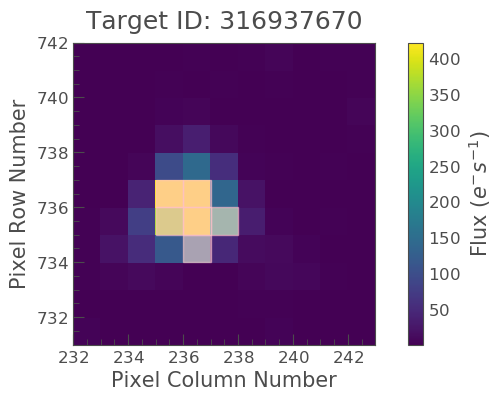

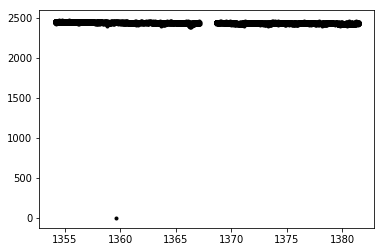

now lets see what data points were flagged (where Bit != 0)
[ 16 512]
18317 18317
 
we can create a mask to remove these points


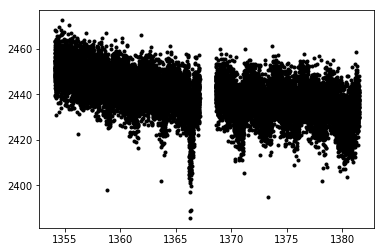

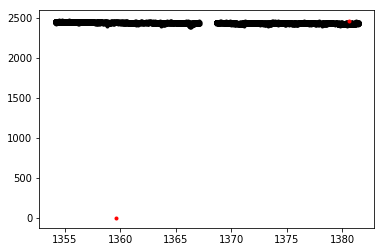

below: momentum dump every 2.5 days?


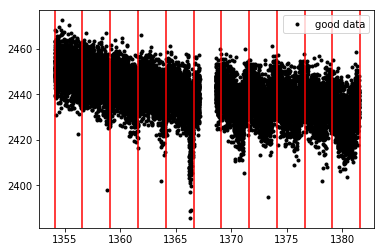

bad times [1359.64676184 1380.61713219]


In [92]:

tpfs = search_targetpixelfile(ID,mission="TESS",radius=1,sector=2).download()

# Create a median image of the source over time
median_image = np.nanmedian(tpfs.flux, axis=0)

# Select pixels which are brighter than the 55th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 95)

# Plot that aperture
tpfs.plot(aperture_mask=aperture_mask);
plt.show()


lc = tpfs.to_lightcurve(aperture_mask=aperture_mask)
plt.plot(lc.time,lc.flux,'k.')
plt.show()

print("now lets see what data points were flagged (where Bit != 0)")
print(lc.quality[np.where(lc.quality!=0)[0]])
print(len(lc.quality),len(lc.time))

print(" ")
print("we can create a mask to remove these points")
goodmask = [np.where(lc.quality==0)[0]]

plt.plot(lc.time[goodmask],lc.flux[goodmask],'k.')
plt.show()

badmask = [np.where(lc.quality!=0)[0]]

plt.plot(lc.time[goodmask],lc.flux[goodmask],'k.')
plt.plot(lc.time[badmask],lc.flux[badmask],'r.')
plt.show()

# jittermask = (lc.time < 1346) | (lc.time > 1350)
# masked_lc = lc[jittermask]
# goodmask = [np.where(masked_lc.quality==0)[0]]

print("below: momentum dump every 2.5 days?")
plt.plot(lc.time[goodmask],lc.flux[goodmask],'k.',label='good data')# with bad region 1347-1349')
# plt.plot(lc.time[badmask],lc.flux[badmask],'r.',label='bad data')
# plt.plot(masked_lc.time[goodmask],masked_lc.flux[goodmask],'k.',label='good data')

for i in range(12):
    plt.axvline(lc.time[goodmask][0]+i*2.5,color='r')# momentum dumps every 2.5 days?

plt.legend(loc='best')
plt.show()

# plt.plot(masked_lc.time[goodmask],masked_lc.flux[goodmask],'k.',label='good data')
# plt.legend(loc='best')
# plt.show()

print("bad times", lc.time[badmask])

# Still working on this. Goal: Mask out data points that are within +/- 30 minutes of a momentum dump.